In [ ]:
!pip install itables

In [ ]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 200)

In [3]:
def load_data():
    try:
        print("Load colleges from local")
        df = pd.read_csv("reportcard.csv",index_col=0)
    except FileNotFoundError:
        print("Load colleges from github")
        df = pd.read_csv("https://raw.githubusercontent.com/LastMileNow/opendata/main/reportcard.csv",index_col=0)
    try:
        print("Load majors from local")
        df_majors = pd.read_csv("reportcard_major.csv",index_col=0)
    except FileNotFoundError:
        print("Load majors from github")
        df_majors = pd.read_csv("https://raw.githubusercontent.com/LastMileNow/opendata/main/reportcard_major.csv",index_col=0)

    majors = list(df_majors['cip.title'].unique())
    titles = list(df_majors['cip.credential.title'].unique())
    return df,df_majors,titles,majors

In [4]:
df_college,df_majors,titles,majors = load_data()

Load colleges from local


C:\Users\wengc\AppData\Local\Temp\ipykernel_19304\1140780859.py:4: DtypeWarning: Columns (1544,1545,1546,1547,1548,1549,1996) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("reportcard.csv",index_col=0)


Load majors from local


In [7]:
def csv_to_dict(file_path):
    result_dict = {}
    try:
        df = pd.read_csv(file_path)
        result_dict = dict(zip(df["code"], df["display"]))
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    
    return result_dict
    
def rename_and_keep_columns(dataframe, column_mapping):
    # Rename columns using the provided dictionary
    dataframe.rename(columns=column_mapping, inplace=True)
    
    # Keep only the columns specified in the dictionary
    columns_to_keep = list(column_mapping.values())
    dataframe = dataframe[columns_to_keep]
    
    return dataframe

# Example usage:
file_path = 'show_col.csv'
data_dict = csv_to_dict(file_path)
print(data_dict)

{'cip.code': 'CIP', 'cip.title': 'College'}


In [8]:
rename_and_keep_columns(df_majors, data_dict)

,CIP,College
cip.unit_id,,
100654.0,1002,Audiovisual Communications Technologies/Technicians.
100654.0,1101,"Computer and Information Sciences, General."
100654.0,1312,"Teacher Education and Professional Development, Specific Levels and Methods."
100654.0,1313,"Teacher Education and Professional Development, Specific Subject Areas."
100654.0,1410,"Electrical, Electronics and Communications Engineering."
...,...,...
NaN,3105,Health and Physical Education/Fitness.
NaN,1204,Cosmetology and Related Personal Grooming Services.
NaN,1204,Cosmetology and Related Personal Grooming Services.


In [5]:
df_majors

,cip.code,cip.title,cip.credential.level,cip.credential.title,cip.counts.ipeds_awards1,cip.counts.ipeds_awards2,cip.debt.staff_grad_plus.all.all_inst.count,cip.debt.staff_grad_plus.all.all_inst.average,cip.debt.staff_grad_plus.all.all_inst.median,cip.debt.staff_grad_plus.all.eval_inst.count,...,cip.earnings.highest.3_yr.working_not_enrolled.overall_count,cip.earnings.highest.3_yr.overall_count_over_poverty_line,cip.earnings.highest.3_yr.not_enrolled.pell_count,cip.earnings.highest.3_yr.pell_median_earnings,cip.earnings.highest.3_yr.not_enrolled.nonpell_count,cip.earnings.highest.3_yr.nonpell_median_earnings,cip.earnings.highest.3_yr.not_enrolled.male_count,cip.earnings.highest.3_yr.male_median_earnings,cip.earnings.highest.3_yr.not_enrolled.nonmale_count,cip.earnings.highest.3_yr.nonmale_median_earnings
cip.unit_id,,,,,,,,,,,,,,,,,,,,,
100654.0,1002,Audiovisual Communications Technologies/Technicians.,3,Bachelor’s Degree,20,35,42,NaN,43213.0,42,...,0,0,0,NaN,0,NaN,0,NaN,0,NaN
100654.0,1101,"Computer and Information Sciences, General.",3,Bachelor’s Degree,30,31,48,NaN,31000.0,48,...,29,27,0,NaN,0,NaN,17,76558.0,0,NaN
100654.0,1312,"Teacher Education and Professional Development, Specific Levels and Methods.",5,Master's Degree,24,19,0,NaN,NaN,28,...,17,17,0,NaN,0,NaN,0,NaN,0,NaN
100654.0,1313,"Teacher Education and Professional Development, Specific Subject Areas.",3,Bachelor’s Degree,18,2,0,NaN,NaN,0,...,28,24,24,32231.0,0,NaN,24,36210.0,0,NaN
100654.0,1410,"Electrical, Electronics and Communications Engineering.",3,Bachelor’s Degree,28,34,51,NaN,31000.0,51,...,26,26,31,70764.0,0,NaN,27,69927.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,3105,Health and Physical Education/Fitness.,1,Undergraduate Certificate or Diploma,0,0,0,10815.0,5448.0,0,...,151,113,81,30863.0,94,34791.0,110,34848.0,66,29980.0
NaN,1204,Cosmetology and Related Personal Grooming Services.,1,Undergraduate Certificate or Diploma,0,0,0,NaN,NaN,0,...,63,39,58,20406.0,17,13962.0,0,NaN,74,18779.0
NaN,1204,Cosmetology and Related Personal Grooming Services.,1,Undergraduate Certificate or Diploma,0,0,0,NaN,NaN,0,...,91,50,78,17748.0,29,17238.0,0,NaN,102,17808.0


In [7]:
df = df_college.merge(df_majors[(df_majors['cip.title'].isin(['Computer Science.'])) & (df_majors['cip.credential.title']=='Bachelor’s Degree')], left_on='id', right_on='cip.unit_id')

In [9]:
df[['cip.counts.ipeds_awards1','size']]

cip.counts.ipeds_awards1   size
0                          26   8787
1                         324  62633
2                         211  34659
3                          48  24880
4                          33   3492
..                        ...    ...
246                       125  15016
247                       150   5618
248                       131   6456
249                        43   6938
250                       216  36284

[251 rows x 2 columns]

In [54]:
# df[df['ADM_RATE']<0.2][['INSTNM','ADM_RATE','DEP_INC_AVG','DEP_INC_PCT_H2']] # .isnull()
df[df['admission_rate.overall']<0.2][
    ['name','admission_rate.overall','pell_grant_rate','ftft_pell_grant_rate','ftft_federal_loan_rate',
    'avg_net_price.public','avg_net_price.public',
    'net_price.public.by_income_level.110001-plus',
    'net_price.private.by_income_level.110001-plus','tuition_revenue_per_fte','tuition.out_of_state',
    'attendance.academic_year','size']]

name  \
56                     California Institute of Technology   
72                      University of California-Berkeley   
75                   University of California-Los Angeles   
84                              Claremont McKenna College   
89                                    Harvey Mudd College   
109                                        Pitzer College   
111                                        Pomona College   
126                     University of Southern California   
135                                      Colorado College   
164                                       Yale University   
175                                 Georgetown University   
223                                      Emory University   
267                                 University of Chicago   
298                               Northwestern University   
343                              University of Notre Dame   
364                                      Grinnell College   
450                        Tulane University of Louisiana   
452                                         Bates College   
453                                       Bowdoin College   
454                                         Colby College   
473                              Johns Hopkins University   
492                                       Amherst College   
517                                    Harvard University   
526                 Massachusetts Institute of Technology   
542                                      Tufts University   
548                                      Williams College   
666                                 College of the Ozarks   
673                     Washington University in St Louis   
709                                     Dartmouth College   
735                                  Princeton University   
760                                       Barnard College   
768           Columbia University in the City of New York   
770   Cooper Union for the Advancement of Science and Art   
771                                    Cornell University   
789                                      Hamilton College   
877                                       Duke University   
1037                           Carnegie Mellon University   
1056                                    Haverford College   
1084                           University of Pennsylvania   
1102                                   Swarthmore College   
1116                                     Brown University   
1200                                Vanderbilt University   
1234                                      Rice University   
1427                                  Stanford University   

      admission_rate.overall  pell_grant_rate  ftft_pell_grant_rate  \
56                    0.0669           0.1141                0.1149   
72                    0.1748           0.2594                0.2077   
75                    0.1433           0.3050                0.2512   
84                    0.1334           0.1772                0.1982   
89                    0.1796           0.1294                0.1384   
109                   0.1657           0.1426                0.1196   
111                   0.0862           0.2095                0.1947   
126                   0.1611           0.1964                0.1705   
135                   0.1360           0.1134                0.1439   
164                   0.0653           0.1840                0.1981   
175                   0.1681           0.1291                0.1305   
223                   0.1917           0.1888                0.2125   
267                   0.0731           0.1144                0.1328   
298                   0.0931           0.1838                0.2039   
343                   0.1899           0.1028                0.1126   
364                   0.1925           0.1875                0.1808   
450                   0.1111           0.1014                0.0769   
452                   0.1410 

In [13]:
topschools = df[df['admission_rate.overall']<0.3]

In [14]:
df['net_price.by_income_level.110001-plus']=df[['net_price.public.by_income_level.110001-plus','net_price.private.by_income_level.110001-plus']].max(axis=1)

In [16]:
df[['name','admission_rate.overall','net_price.by_income_level.110001-plus','10_yrs_after_entry.working_not_enrolled.mean_earnings']]

name  \
0                                          Alabama A & M University   
1                               University of Alabama at Birmingham   
2                               University of Alabama in Huntsville   
3                                          Alabama State University   
4                                         The University of Alabama   
...                                                             ...   
1473  Northwest University-Center for Online and Extended Education   
1474                  Indiana Wesleyan University-National & Global   
1475                                       Purdue University Global   
1476                                    Purdue University Northwest   
1477                         University of Wisconsin-Milwaukee Flex   

      admission_rate.overall  net_price.by_income_level.110001-plus  \
0                     0.8965                                20483.0   
1                     0.8060                                19717.0   
2                     0.7711                                19862.0   
3                     0.9888                                17559.0   
4                     0.8039                                23605.0   
...                      ...                                    ...   
1473                     NaN                                27663.0   
1474                     NaN                                23078.0   
1475                     NaN                                    NaN   
1476                  0.3028                                17408.0   
1477                  1.0000                                    NaN   

      10_yrs_after_entry.working_not_enrolled.mean_earnings  
0                                                     35500  
1                                                     48400  
2                                                     52000  
3                                                     30600  
4                                                     51600  
...                                                     ...  
1473                                                      0  
1474                                                      0  
1475                                                      0  
1476                                                      0  
1477                                                      0  

[1478 rows x 4 columns]

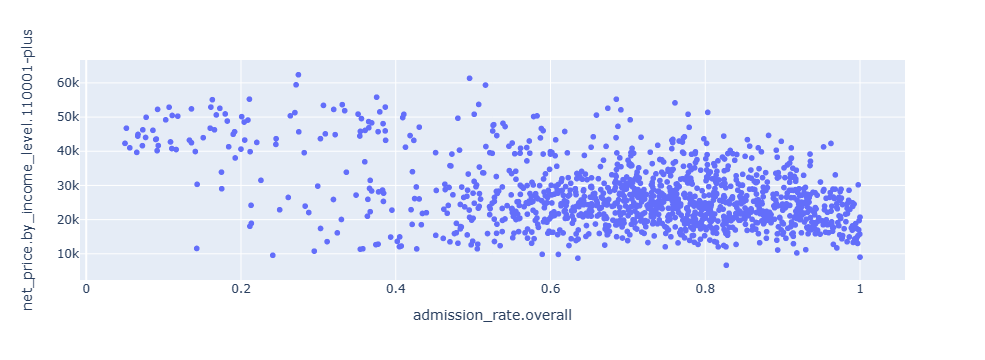

In [59]:
import plotly.express as px
fig = px.scatter(df, x="admission_rate.overall", y="net_price.by_income_level.110001-plus",hover_name="name", hover_data=['admission_rate.overall','net_price.by_income_level.110001-plus','attendance.academic_year'])
fig.show()

In [68]:
regionMap = {0:"U.S. Service Schools",1:"New Englend",2:"Mid East",3:"Great Lakes",4:"Plains",5:"Southeast",6:"Southwest",7:"Rocky Mountains",8:"Far West",9:"Outlying"}
df['region_id'] = df['region_id'].map(regionMap)
localeMap = {11:'Large City',12:'Midsize City',13:'Small City',21:'Large Suburb',22:'Midsize Suburb',23:'Small Suburb',
             31:'Fringe Town',32:'Distant Town',33:'Remote Town',41:'Fringe Rural',42:'Distant Rural',43:'Remote Rural'}
df['locale'] = df['locale'].map(localeMap)
df[['name','region_id','locale']]

name  \
0                                          Alabama A & M University   
1                               University of Alabama at Birmingham   
2                               University of Alabama in Huntsville   
3                                          Alabama State University   
4                                         The University of Alabama   
...                                                             ...   
1473  Northwest University-Center for Online and Extended Education   
1474                  Indiana Wesleyan University-National & Global   
1475                                       Purdue University Global   
1476                                    Purdue University Northwest   
1477                         University of Wisconsin-Milwaukee Flex   

        region_id        locale  
0       Southeast  Midsize City  
1       Southeast  Midsize City  
2       Southeast  Midsize City  
3       Southeast  Midsize City  
4       Southeast  Midsize City  
...           ...           ...  
1473     Far West  Large Suburb  
1474  Great Lakes  Fringe Rural  
1475  Great Lakes    Large City  
1476  Great Lakes  Large Suburb  
1477  Great Lakes    Large City  

[1478 rows x 3 columns]